# High Risk of Covid-19 Death Prediction using Machine Learning

## 1. Introduction

### 1.1 Source of the data
    Dataset link : https://www.kaggle.com/datasets/meirnizri/covid19-dataset
    This dataset was taken from kaggle.

### 1.2 Description of the dataset
    The dataset was provided by the Mexican government. 
    This dataset contains an enormous number of anonymized patient-related information including pre-conditions. 
    The raw dataset consists of 21 unique features and 1,048,575 unique patients.

### 1.3 Load the Dataset 

In [1]:
import pandas as pd

df = pd.read_csv('Covid_Data.csv')
display(df.head())
print("Dataset shape: ",df.shape)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Dataset shape:  (1048575, 21)


### 1.4 Data Cleaning and Preprocessing 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [3]:
print("Number od distinct values in each column: ")
for col in df.columns : 
    print('{:<20} => {:>10}'.format(col, len(df[col].unique())))

Number od distinct values in each column: 
USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [4]:
for col in df.columns :
    print("Column name: "+col)
    print(df[col].value_counts())
    print()

Column name: USMER
2    662903
1    385672
Name: USMER, dtype: int64

Column name: MEDICAL_UNIT
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

Column name: SEX
1    525064
2    523511
Name: SEX, dtype: int64

Column name: PATIENT_TYPE
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

Column name: DATE_DIED
9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
23/02/2021         1
07/02/2021         1
10/03/2021         1
23/10/2020         1
20/02/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

Column name: INTUBED
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

Column name: PNEUMONIA
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

Column name: AGE
30     27010
31     25927
28     25313
29

In [5]:
# Processing the death based on the date
import numpy as np

df['DIED'] = np.where(df['DATE_DIED'] == '9999-99-99', 2, 1)
df.drop(columns=['DATE_DIED'], inplace=True)
print(df['DIED'].value_counts())
df.head()

2    971633
1     76942
Name: DIED, dtype: int64


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


In [6]:
# Handling pregency values for male and female

male_pregnant_count = df[df['SEX'] == 2]['PREGNANT'].value_counts()
print("Male Pregnant: ")
print(male_pregnant_count)
print()
female_pregnant_count = df[df['SEX'] == 1]['PREGNANT'].value_counts()
print("Female Pregnant: ")
print(female_pregnant_count)

Male Pregnant: 
97    523511
Name: PREGNANT, dtype: int64

Female Pregnant: 
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64


In [7]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,2,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,2,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,2,1,2,...,2,1,2,2,2,2,2,3,97,1


### 1.5 Handling missing values

In [8]:
print("Missing Values percentage")
for col in df.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(df[(df[col]==98) | (df[col]==99) | (df[col]==97)])/len(df)*100))

Missing Values percentage
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>       0.00%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%
DIED                 =>       0.00%


In [9]:
# Dropping the columns with highest missing values percentage

df.drop(columns=['INTUBED','ICU'],inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


In [10]:
columns = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION','OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']

for col in columns :
    df = df[(df[col] == 1)|(df[col] == 2)]

In [11]:
print("Missing Values percentage")
for col in df.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(df[(df[col]==98) | (df[col]==99) | (df[col]==97)])/len(df)*100))

Missing Values percentage
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
PNEUMONIA            =>       0.00%
AGE                  =>       0.03%
PREGNANT             =>       0.00%
DIABETES             =>       0.00%
COPD                 =>       0.00%
ASTHMA               =>       0.00%
INMSUPR              =>       0.00%
HIPERTENSION         =>       0.00%
OTHER_DISEASE        =>       0.00%
CARDIOVASCULAR       =>       0.00%
OBESITY              =>       0.00%
RENAL_CHRONIC        =>       0.00%
TOBACCO              =>       0.00%
CLASIFFICATION_FINAL =>       0.00%
DIED                 =>       0.00%


In [12]:
print("Datset shape after preprocessing and handling missing values: ",df.shape)

Datset shape after preprocessing and handling missing values:  (1025152, 19)


## 2. Goal of the Project
    The main goal of this project is to build a machine learning model that, given a patient's current symptom, status, and medical history, will predict whether the patient is at high risk of death or not. By identifying relevant features and relationships within the dataset, researchers can develop more accurate diagnostic tools and models, ultimately contributing to improved early detection and prevention of risk of death

## 3. Data Analysis

### 3.1 Data Visualization

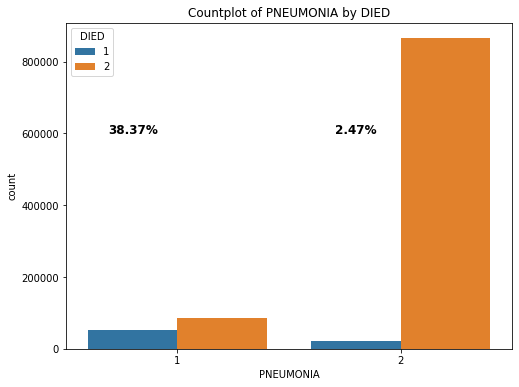

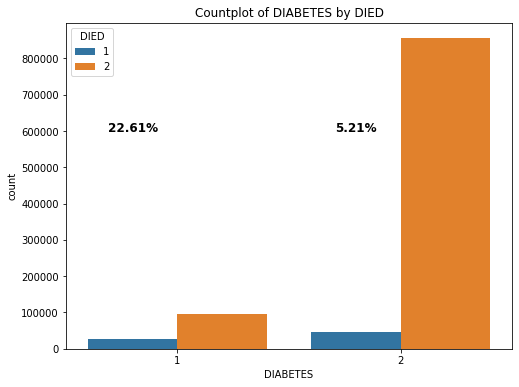

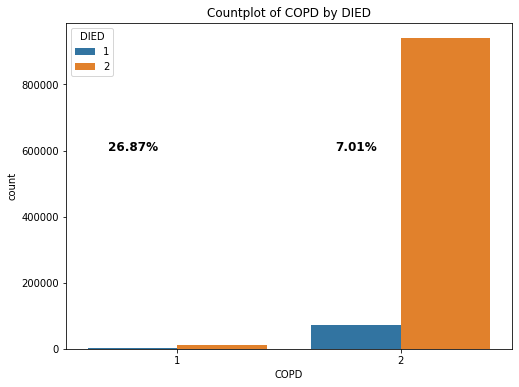

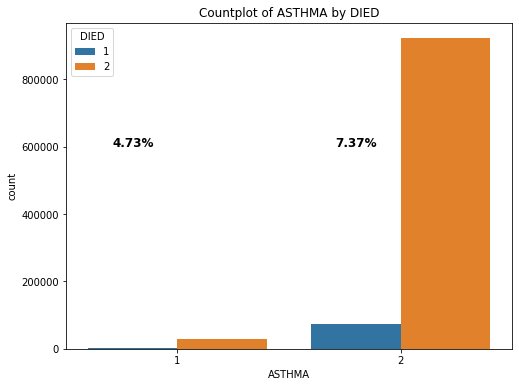

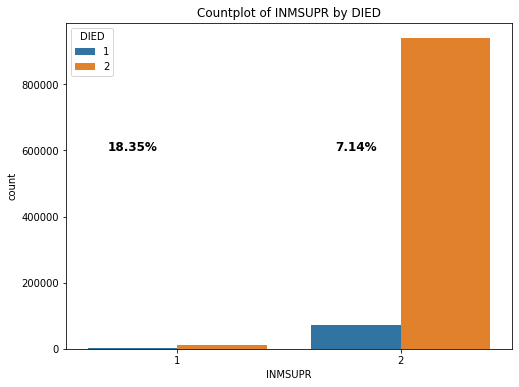

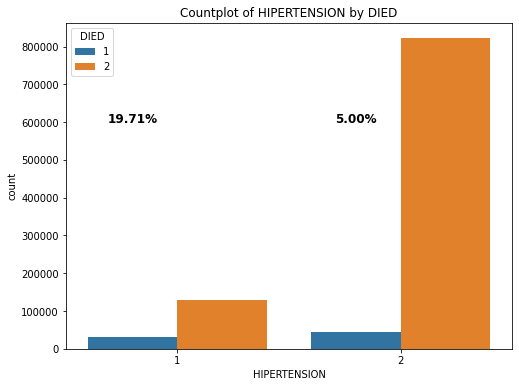

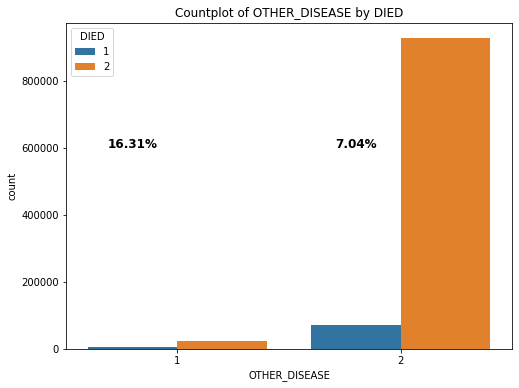

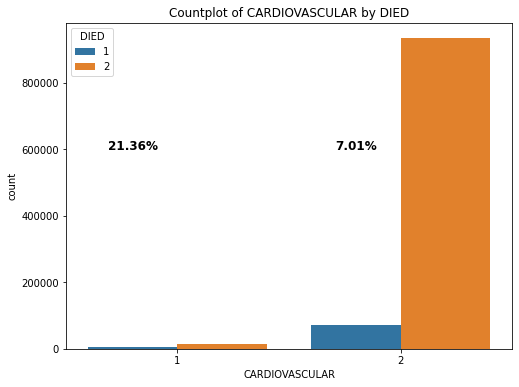

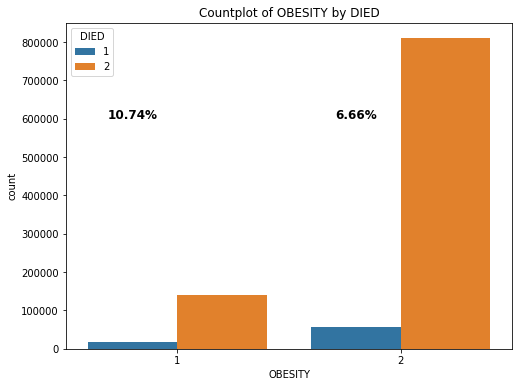

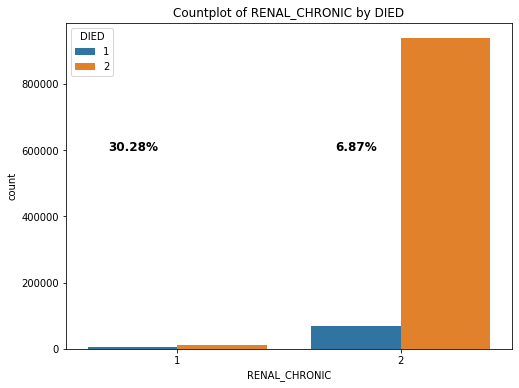

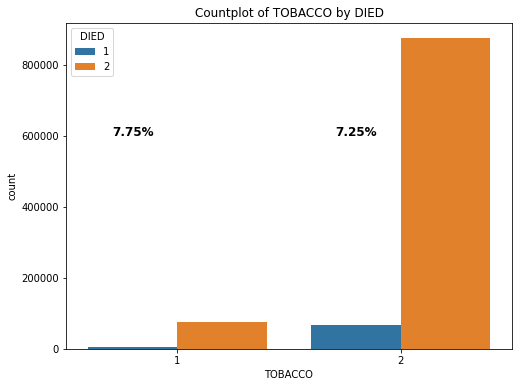

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['PNEUMONIA','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=col, hue='DIED', data=df)
    for i in range(0,len(ax.patches)//2):
        percent = ax.patches[i].get_height()/(ax.patches[i].get_height() + ax.patches[i+2].get_height())*100
        ax.annotate(f'{percent:.2f}%', (ax.patches[i].get_x() + ax.patches[i].get_width() / 2., 600000),ha='center', va='baseline',color='black', weight='bold',fontsize=12)
    plt.title(f'Countplot of {col} by DIED')
    plt.show()

### 3.2 Distribution of fields

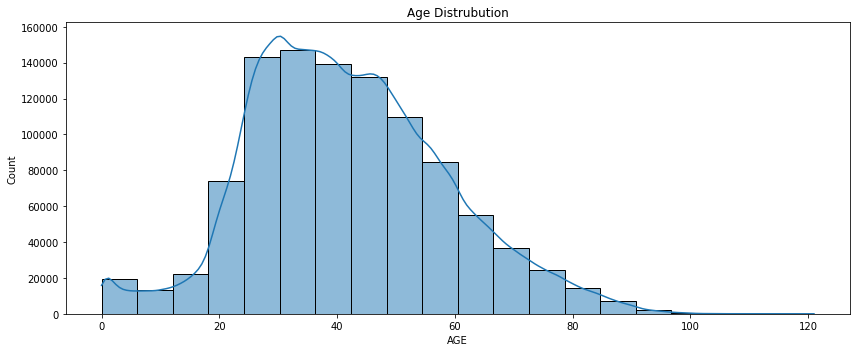

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['AGE']
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(12, 5))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes)
    axes.set_title("Age Distrubution")
plt.tight_layout()
plt.show()

c:\users\sweth\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


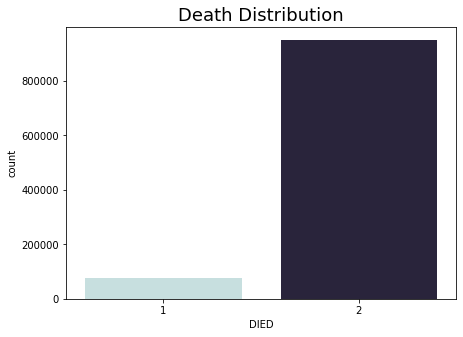

In [15]:
import  matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.title('Death Distribution', fontsize=18)
ax = sns.countplot(df['DIED'], palette="ch:start=.2,rot=-.3")

### 3.3 Interesting Relationships

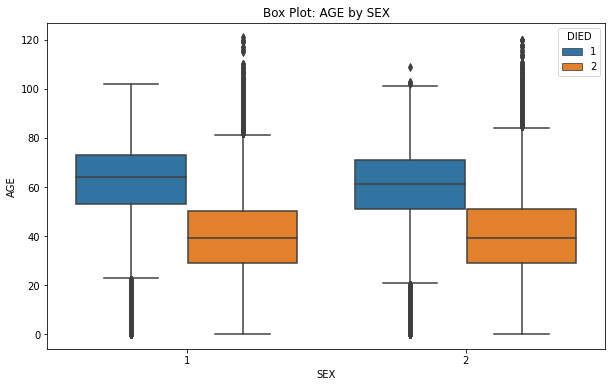

Relationship: Most of the males and females died after the age of around 55


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='AGE', hue='DIED', data=df)
plt.title('Box Plot: AGE by SEX')
plt.show()

print("Relationship: Most of the males and females died after the age of around 55")

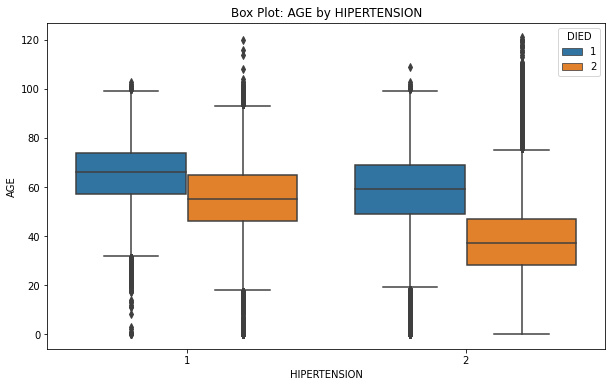

Relationship: Patients with Hypertension between the age 60 to 65 have 50% of chances to death
Relationship: Patients without Hypertension below the age 55 or 56 are more likely to live longer


In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HIPERTENSION', y='AGE', hue='DIED', data=df)
plt.title('Box Plot: AGE by HIPERTENSION')
plt.show()

print("Relationship: Patients with Hypertension between the age 60 to 65 have 50% of chances to death")
print("Relationship: Patients without Hypertension below the age 55 or 56 are more likely to live longer")

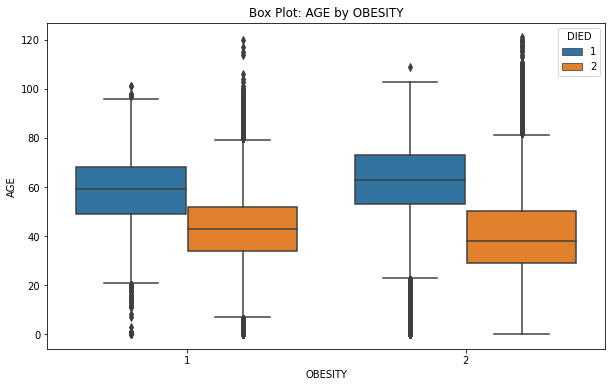

Relationship: Patients with obesity after the age 55 or 56 are more likely to die
Relationship: Patients without obesity below the age 60 are more likely to live longer


In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='OBESITY', y='AGE', hue='DIED', data=df)
plt.title('Box Plot: AGE by OBESITY')
plt.show()

print("Relationship: Patients with obesity after the age 55 or 56 are more likely to die")
print("Relationship: Patients without obesity below the age 60 are more likely to live longer")

### 3.4 Correlation analysis 

Text(0.5, 1.0, 'Correlation Between Features')

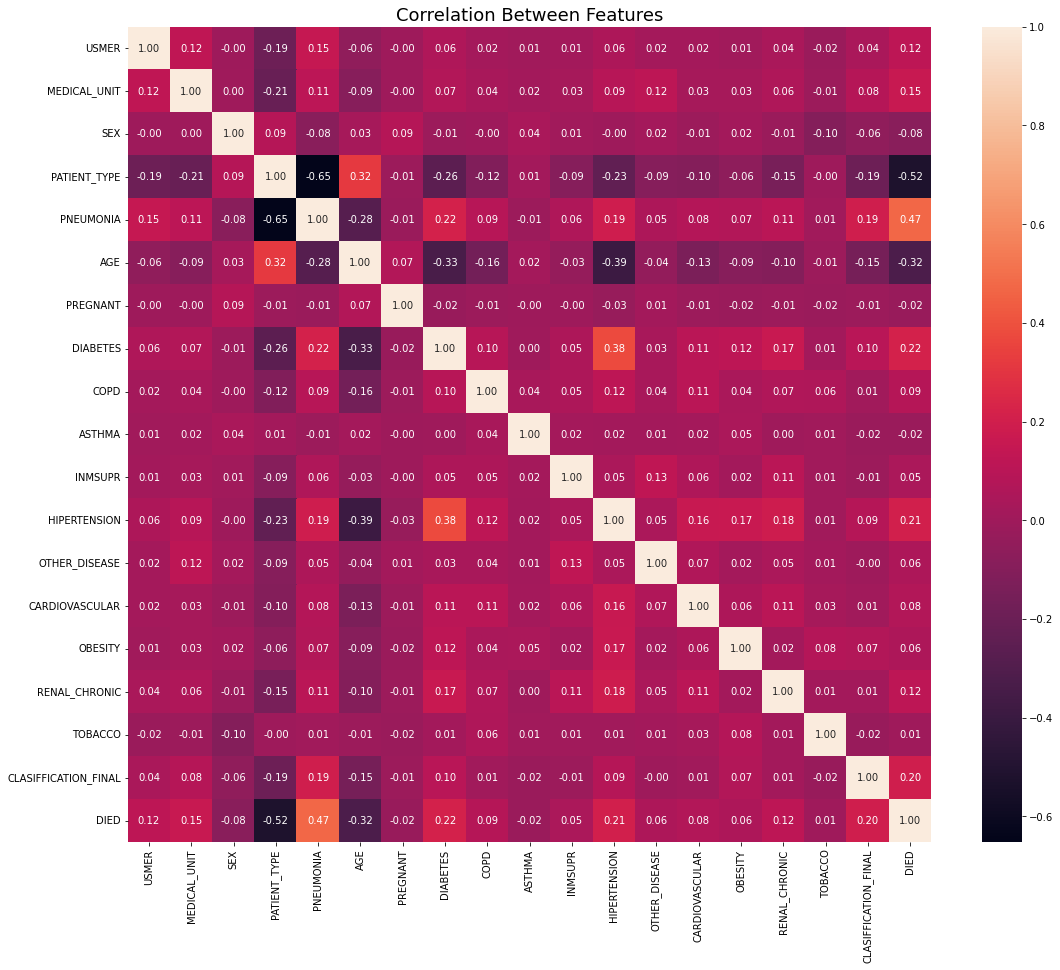

In [19]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)

### 3.5 Important variables wrt target variable DIED

In [20]:
correlation_with_target = df.corr()['DIED'].sort_values(ascending=False)
print(correlation_with_target)

DIED                    1.000000
PNEUMONIA               0.470800
DIABETES                0.217115
HIPERTENSION            0.205158
CLASIFFICATION_FINAL    0.197313
MEDICAL_UNIT            0.154588
RENAL_CHRONIC           0.119396
USMER                   0.118973
COPD                    0.089846
CARDIOVASCULAR          0.076582
OTHER_DISEASE           0.057247
OBESITY                 0.056427
INMSUPR                 0.049308
TOBACCO                 0.005245
ASTHMA                 -0.017221
PREGNANT               -0.020997
SEX                    -0.080882
AGE                    -0.322412
PATIENT_TYPE           -0.520023
Name: DIED, dtype: float64


### 3.6 Principal Component Analysis 

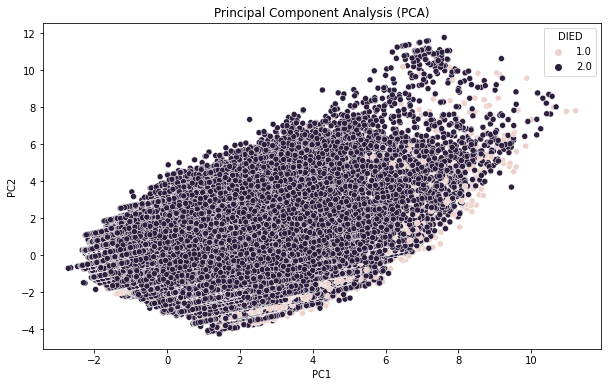

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_cols = ['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','PNEUMONIA','AGE','PREGNANT','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION','OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO','CLASIFFICATION_FINAL']
X = df[numerical_cols]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['DIED'] = df['DIED']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIED', data=df_pca)
plt.title('Principal Component Analysis (PCA)')
plt.show()


In [22]:
df_pca

,PC1,PC2,DIED
0,2.341956,-0.548472,1.0
1,4.313648,1.816856,1.0
2,2.263842,-1.063090,1.0
3,-0.524271,0.117579,1.0
4,2.413779,0.798182,1.0
...,...,...,...
1025147,-1.283212,0.304062,2.0
1025148,1.421621,-0.193238,2.0
1025149,-0.937434,0.443544,2.0
1025150,-1.559835,0.192477,2.0


### 3.7 Feature Selection and Engineering 

In [23]:
#Dropping high correlated features to reduce redundancy

correlation_matrix = df.corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)
df_no_high_corr = df.drop(highly_correlated_features, axis=1)
df_no_high_corr.head()

set()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


In [24]:
correlations = df.corr()['DIED']
selected_features = correlations[correlations > 0].index
df = df.drop('ASTHMA', axis=1)
display(df.head())

print("Though SEX, AGE, PATIENT_TYPE and PREGNANT have negative correlation with DIED we only dropped ASTHMA because the other features were important for predicting the target variable. Maybe this feature could have non-linear or more intricate relationship with target variable.")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DIED
0,2,1,1,1,1,65,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,1,2,2,2,2,2,3,1


Though SEX, AGE, PATIENT_TYPE and PREGNANT have negative correlation with DIED we only dropped ASTHMA because the other features were important for predicting the target variable. Maybe this feature could have non-linear or more intricate relationship with target variable.


## 4. Model Building

In [25]:
Y = df['DIED']
X = df.drop('DIED', axis=1)

c:\users\sweth\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


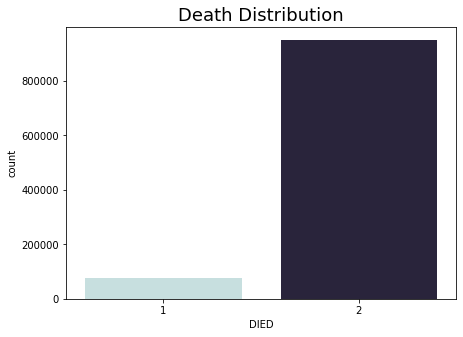

In [43]:
plt.figure(figsize=(7,5))
plt.title('Death Distribution', fontsize=18)
ax = sns.countplot(df['DIED'], palette="ch:start=.2,rot=-.3")

In [26]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=0)
X, Y = sampler.fit_resample(X,Y)

c:\users\sweth\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


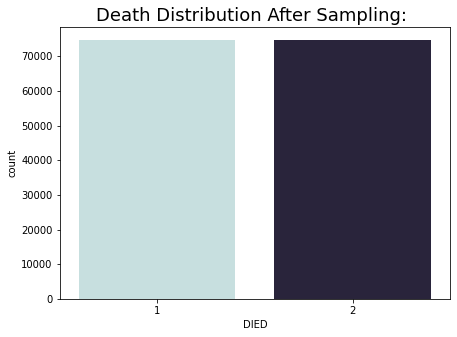

In [27]:
import  matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.title('Death Distribution After Sampling: ', fontsize=18)
ax = sns.countplot(Y, palette="ch:start=.2,rot=-.3")

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("Y_train shape: ",Y_train.shape)
print("Y_test shape: ",Y_test.shape)

X_train shape:  (119542, 17)
X_test shape:  (29886, 17)
Y_train shape:  (119542,)
Y_test shape:  (29886,)


In [29]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,0.906984,1.032716,-1.138000,-1.041359,0.812734,-0.682358,0.064352,0.555802,0.179241,0.150218,0.622151,0.207202,0.197229,-2.095318,0.215283,0.302092,-0.875089
1,-1.102555,1.032716,-1.138000,-1.041359,0.812734,-1.269621,0.064352,0.555802,0.179241,0.150218,0.622151,0.207202,0.197229,0.477254,0.215283,0.302092,1.212922
2,-1.102555,-0.534688,0.878734,0.960283,-1.230415,0.865880,0.064352,0.555802,0.179241,0.150218,-1.607327,0.207202,-5.070239,-2.095318,0.215283,0.302092,-0.875089
3,0.906984,1.032716,0.878734,-1.041359,0.812734,-0.468808,0.064352,0.555802,0.179241,0.150218,0.622151,0.207202,0.197229,0.477254,0.215283,-3.310255,1.212922
4,-1.102555,1.032716,-1.138000,0.960283,-1.230415,1.666692,0.064352,0.555802,0.179241,0.150218,0.622151,0.207202,0.197229,0.477254,0.215283,0.302092,-0.875089


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)

print("Y_predictions: ",Y_pred)

Y_predictions:  [2 1 1 ... 1 2 2]


## 5. Evaluation

In [31]:
# Accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

print("Logistic Accuracy: ",accuracy_score(Y_pred,Y_test))
print("Precision: ",precision_score(Y_test, Y_pred))
print("Recall: ",recall_score(Y_test, Y_pred))
print("F1-score: ",f1_score(Y_test, Y_pred))

Logistic Accuracy:  0.9109281938031185
Precision:  0.8982203169654456
Recall:  0.9266282497989815
F1-score:  0.9122031662269129


Confusion matrix: 
[[13829  1095]
 [ 1567 13395]]


<AxesSubplot:>

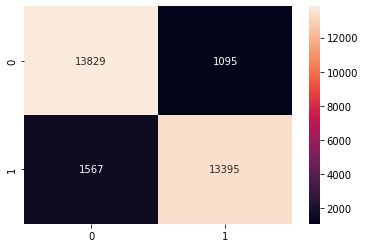

In [32]:
# Confusion matrix
import  matplotlib.pyplot as plt
import seaborn as sns

print("Confusion matrix: ")
print(confusion_matrix(Y_test, Y_pred))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='.0f')

In [55]:
# ROC_AUC -- correctly distinguished the positive and negative classes
from sklearn.metrics import roc_curve, auc, roc_auc_score

Y_pred_prob = model.predict_proba(X_test_scaled)[:, 1] 
print("ROC: ",roc_auc_score(Y_test, Y_pred_prob))


ROC:  0.9559015130835693


In [34]:
# LOSSES
from sklearn.metrics import mean_squared_error, log_loss

#print("MSE: ",mean_squared_error(Y_test, Y_pred_prob))
print("LOG_LOSS: ",log_loss(Y_test, Y_pred_prob))

LOG_LOSS:  0.2497241832332435


In [35]:
# Classification Report
from sklearn.metrics import classification_report

print("Classification Report: ")
print(classification_report(Y_test, Y_pred))

Classification Report: 
              precision    recall  f1-score   support

           1       0.90      0.93      0.91     14924
           2       0.92      0.90      0.91     14962

    accuracy                           0.91     29886
   macro avg       0.91      0.91      0.91     29886
weighted avg       0.91      0.91      0.91     29886



## 6. Discussion 

### 6.1 Summarize your findings and analysis 

In this project, the dataset was processed to handle missing values, create a binary target variable ('DIED') based on the date of death, and address pregnancy values for males and females. Columns with the highest missing values percentage were dropped, and missing values labeled as 97, 98, or 99 were removed. Exploratory data analysis included visualizations of categorical features' distribution by death status, age distribution, and box plots showing relationships between sex, age, and death. Notable findings include an age-based analysis indicating that males and females above 55 have a higher likelihood of death.Additionally, logistic regression modeling was employed, achieving an accuracy of 94% with insightful feature importance and principal component analysis (PCA). Subsequently, random undersampling was applied to address class imbalance, resulting in a balanced dataset. Logistic regression evaluation metrics post-undersampling indicated a high accuracy (91%), precision (90%), recall (93%), and F1-score (91%). The confusion matrix emphasized the model's improved ability to correctly classify instances, underscoring the significance of addressing class imbalance in enhancing model performance for predicting the target variable 'DIED.'The project aims to contribute to building a predictive model for High Risk of Covid - 19 Death Prediction, with a focus on feature engineering and interpretation.

### 6.2 What further analysis can be done? 

1. Feature Importance Refinement:
    Revisit feature importance analysis using techniques like Recursive Feature Elimination (RFE) to iteratively remove less important features and observe the impact on model performance.
2. Cross-Validation:
    Conduct cross-validation to assess the model's stability and generalizability. This involves training and evaluating the model on multiple subsets of the data to obtain a more robust estimate of its performance.
3. Different Models:
    Consider trying different classification algorithms (e.g., Decision Trees, Random Forests, Support Vector Machines) to see if a different model architecture performs better for your specific dataset.
4. Hyperparameter Tuning:
    Optimize hyperparameters for the logistic regression model using techniques like grid search or randomized search to find the parameter values that result in the best performance.